# DATA LOAD

In [68]:
# Optional for clear plotting on Macs
# %config InlineBackend.figure_format='retina'

# Some of the network training leads to warnings. When we know and are OK with
#  what's causing the warning and simply don't want to see it, we can use the
#  following code. Run this block
#  to disable warnings
import sys
import os
import warnings

warnings.filterwarnings("ignore")

if not sys.warnoptions:

    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"



In [69]:
# Install libraries
!pip install dame_flame
!pip install stargazer

You should consider upgrading via the '/Users/tegochang/opt/miniconda3/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/tegochang/opt/miniconda3/bin/python3.9 -m pip install --upgrade pip' command.


In [70]:
# Load libraries
import pandas as pd
import numpy as np
from scipy import stats
from plotnine import *
import dame_flame
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pathlib import Path
import altair as alt
alt.data_transformers.disable_max_rows()
from statsmodels.graphics.gofplots import ProbPlot


In [71]:
# Load datasets
fl = pd.read_csv('../00_source_data/listings_florida.csv.gz')
ca = pd.read_csv('../00_source_data/listings_california.csv.gz')

In [72]:
# Add county column to datasets
fl['county'] = 'FL'
ca['county'] = 'CA'

In [73]:
# Merge datasets into one
frames = [fl, ca]
listings = pd.concat(frames, ignore_index=True)

In [74]:
listings

id                            listing_url       scrape_id  \
0         57818     https://www.airbnb.com/rooms/57818  20211223224458   
1         69824     https://www.airbnb.com/rooms/69824  20211223224458   
2         83449     https://www.airbnb.com/rooms/83449  20211223224458   
3        105411    https://www.airbnb.com/rooms/105411  20211223224458   
4        129061    https://www.airbnb.com/rooms/129061  20211223224458   
...         ...                                    ...             ...   
45855  53683908  https://www.airbnb.com/rooms/53683908  20211205213202   
45856  53684062  https://www.airbnb.com/rooms/53684062  20211205213202   
45857  53684370  https://www.airbnb.com/rooms/53684370  20211205213202   
45858  53684541  https://www.airbnb.com/rooms/53684541  20211205213202   
45859  53686384  https://www.airbnb.com/rooms/53686384  20211205213202   

      last_scraped                                               name  \
0       2021-12-24                  Private house close to the beach!   
1       2021-12-24                          2 bd/2ba Oceanfront Condo   
2       2021-12-24                      MARY POP APTS 2/1 APT SLEEP 5   
3       2021-12-24                               House in the Ranches   
4       2021-12-24                MIAMI - LUXURY APARTMENT OVER BEACH   
...            ...                                                ...   
45855   2021-12-06  1+1 Cozy & Comfortable Hollywood Apt With Balcony   
45856   2021-12-07      1+1 Resort Style Apt @ DTLA With Free Parking   
45857   2021-12-06      1+1 Resort Style Apt @ DTLA With Free Parking   
45858   2021-12-06     NEXT TO RUNYON CANYON 1BD APT-PARKING-GYM-POOL   
45859   2021-12-07  Modernly furnished 1 bedroom 1 Bath by Melrose...   

                                             description  \
0      Beautifully private duplex that allows you to ...   
1      <b>The space</b><br />Beautiful and meticulous...   
2      MARY POP APARTMENTS 1&2 BEDROOM SUITES ACCOMMO...   
3      Close to Cleveland Clinic Hospital and mayor h...   
4      <b>The space</b><br />The apartment is located...   
...                                                  ...   
45855  <b>License number</b><br />Exempt - This listi...   
45856  <b>License number</b><br />Exempt - This listi...   
45857  <b>License number</b><br />Exempt - This listi...   
45858  Beautiful design 1 Bedroom Apartment in Hollyw...   
45859  1 queen bed<br />1 sofa bed<br />Enjoy a fully...   

                                   neighborhood_overview  \
0      Check-in window<br />After 3:00 PM<br />Edit<b...   
1                                                    NaN   
2                                                    NaN   
3      Very close to I75, one of the main highways. Y...   
4                                                    NaN   
...                                                  ...   
45855                                                NaN   
45856                                                NaN   
45857                                                NaN   
45858                                                NaN   
45859  The apartment is located in one of the most li...   

                                             picture_url    host_id  \
0      https://a0.muscache.com/pictures/347696/9d5168...     275948   
1      https://a0.muscache.com/pictures/443102/f6b94e...     351303   
2      https://a0.muscache.com/pictures/13dd4c7e-4914...     454736   
3      https://a0.muscache.com/pictures/787317/2cc18e...     532930   
4      https://a0.muscache.com/pictures/828456/8efef9...     637272   
...                                                  ...        ...   
45855  https://a0.muscache.com/pictures/6cc30775-28c9...   16760875   
45856  https://a0.muscache.com/pictures/dce6bc2d-c786...   16760875   
45857  https://a0.muscache.com/pictures/73b082df-5d8b...   16760875   
45858  https://a0.muscache.com/pictures/0eea7f61-5cd4...  375448432   
45859  https://a0.muscac

# DATA CLEANING

In [75]:
# List unecessary columns
columns_to_be_dropped = [
    "scrape_id",
    "listing_url",
    "name",
    "host_id",
    "description",
    "neighborhood_overview",
    "picture_url",
    "host_url",
    "host_name",
    "host_location",
    "host_about",
    "host_thumbnail_url",
    "host_picture_url",
    "host_neighbourhood",
    "host_listings_count",
    "host_verifications",
    "neighbourhood",
    "neighbourhood_cleansed",
    "neighbourhood_group_cleansed",
    "property_type",
    "bathrooms",
    "minimum_minimum_nights",
    "maximum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights",
    "maximum_nights_avg_ntm",
    "calendar_updated",
    "availability_30",
    "availability_60",
    "availability_90",
    "calendar_last_scraped",
    "number_of_reviews",
    "reviews_per_month",
    "number_of_reviews_l30d",
    "first_review",
    "last_review",
    "license",
    "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms",
    "calculated_host_listings_count_shared_rooms",
    "host_total_listings_count",
    "last_scraped",
    "host_since",
    "host_response_rate",
    "availability_365",
    # "minimum_nights_avg_ntm",
    "has_availability"
]


In [76]:
# Drop unecessary columns
listings = listings.drop(columns_to_be_dropped, axis = 1)


In [77]:
listings

id  host_response_time host_acceptance_rate host_is_superhost  \
0         57818      within an hour                  85%                 f   
1         69824      within an hour                  60%                 f   
2         83449  within a few hours                  92%                 f   
3        105411        within a day                   0%                 f   
4        129061  within a few hours                  26%                 f   
...         ...                 ...                  ...               ...   
45855  53683908      within an hour                  97%                 f   
45856  53684062      within an hour                  97%                 f   
45857  53684370      within an hour                  97%                 f   
45858  53684541      within an hour                  92%                 f   
45859  53686384      within an hour                 100%                 f   

      host_has_profile_pic host_identity_verified   latitude   longitude  \
0                        t                      t  26.016700  -80.124370   
1                        t                      t  25.976410  -80.120520   
2                        t                      t  26.033920  -80.142010   
3                        t                      t  26.046780  -80.368090   
4                        t                      t  25.993320  -80.118870   
...                    ...                    ...        ...         ...   
45855                    t                      t  34.105036 -118.341116   
45856                    t                      t  34.062093 -118.245931   
45857                    t                      t  34.060570 -118.248007   
45858                    t                      t  34.101427 -118.348458   
45859                    t                      t  34.079530 -118.301060   

             room_type  accommodates  ... review_scores_rating  \
0      Entire home/apt             6  ...                 4.61   
1      Entire home/apt             6  ...                 4.00   
2      Entire home/apt             5  ...                 4.74   
3      Entire home/apt             5  ...                 5.00   
4      Entire home/apt             7  ...                 4.65   
...                ...           ...  ...                  ...   
45855  Entire home/apt             4  ...                  NaN   
45856  Entire home/apt             4  ...                  NaN   
45857  Entire home/apt             4  ...                  NaN   
45858  Entire home/apt             3  ...                  NaN   
45859  Entire home/apt             4  ...                  NaN   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.70                       4.60   
1                        5.00                       5.00   
2                        4.84                       4.84   
3                        5.00                       5.00   
4                        4.78                       4.56   
...                       ...                        ...   
45855                     NaN                        NaN   
45856                     NaN                        NaN   
45857                     NaN                        NaN   
45858                     NaN                        NaN   
45859                     NaN                        NaN   

      review_scores_checkin review_scores_communication  \
0                      5.00                        4.96   
1                      5.00                        4.00   
2                      4.89                        4.89   
3                      5.00                        5.00   
4                      4.61                        5.00   
...                     ...                         ...   
45855                   NaN                         NaN   
45856                   NaN                         NaN   
45857                   NaN                         NaN   
45858                   NaN                         NaN   


In [78]:
listings.columns
listings['amenities']
listings["bathrooms_text"].unique()

array(['1 bath', '2 baths', '1.5 baths', '1.5 shared baths', '3 baths',
       '1 shared bath', '1 private bath', nan, '5 baths', '4 baths',
       '2.5 baths', '3.5 baths', '2 shared baths', '4.5 baths',
       '0 shared baths', '3 shared baths', '0 baths', '8 baths',
       '5.5 baths', '20 baths', '6.5 baths', '7.5 baths', '6 baths',
       '5 shared baths', '7 baths', '10 baths', 'Shared half-bath',
       '2.5 shared baths', '3.5 shared baths', 'Half-bath', '8.5 baths',
       '17 baths', '11 shared baths', '8 shared baths',
       '8.5 shared baths', '11.5 shared baths', '4.5 shared baths',
       '11 baths', 'Private half-bath', '4 shared baths', '9 baths',
       '12.5 baths', '9.5 baths', '11.5 baths', '10.5 baths', '13 baths',
       '5.5 shared baths', '25 baths', '6 shared baths', '12 baths',
       '15.5 baths'], dtype=object)

In [79]:
# Clean categorical variables
listings['host_response_time'] = np.where(listings['host_response_time'] == 'within an hour', 0, listings['host_response_time'])
listings['host_response_time'] = np.where(listings['host_response_time'] == 'within a few hours', 1, listings['host_response_time'])
listings['host_response_time'] = np.where(listings['host_response_time'] == 'within a day', 2, listings['host_response_time'])
listings['host_response_time'] = np.where(listings['host_response_time'] == 'a few days or more', 3, listings['host_response_time'])

listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.strip('%')

listings['host_is_superhost'] = np.where(listings['host_is_superhost'] == 't', 1, listings['host_is_superhost'])
listings['host_is_superhost'] = np.where(listings['host_is_superhost'] == 'f', 0, listings['host_is_superhost'])

listings['host_has_profile_pic'] = np.where(listings['host_has_profile_pic'] == 't', 1, listings['host_has_profile_pic'])
listings['host_has_profile_pic'] = np.where(listings['host_has_profile_pic'] == 'f', 0, listings['host_has_profile_pic'])

listings['host_identity_verified'] = np.where(listings['host_identity_verified'] == 't', 1, listings['host_identity_verified'])
listings['host_identity_verified'] = np.where(listings['host_identity_verified'] == 'f', 0, listings['host_identity_verified'])

listings['room_type'] = np.where(listings['room_type'] == 'Entire home/apt', 0, listings['room_type'])
listings['room_type'] = np.where(listings['room_type'] == 'Hotel room', 1, listings['room_type'])
listings['room_type'] = np.where(listings['room_type'] == 'Private room', 2, listings['room_type'])
listings['room_type'] = np.where(listings['room_type'] == 'Shared room', 3, listings['room_type'])

listings['essentials'] = listings['amenities']
listings['essentials'] = np.where(listings['essentials'].str.contains('Essential'), 1, listings['essentials'])
listings['essentials'] = np.where(listings['essentials'].str.contains('Essential') == False, 0, listings['essentials'])

listings['other_amenities'] = listings['amenities']
listings["other_amenities"] = np.where(
    listings["other_amenities"].str.contains("Essential") == False,
    listings["other_amenities"].apply(lambda x: len(x.split(","))),
    (
        np.where(
            listings["other_amenities"].str.contains("Essential") == True,
            listings["other_amenities"].apply(lambda x: len(x.split(",")) - 1),
            listings["other_amenities"],
        )
    ),
)

listings['instant_bookable'] = np.where(listings['instant_bookable'] == 't', 1, listings['instant_bookable'])
listings['instant_bookable'] = np.where(listings['instant_bookable'] == 'f', 0, listings['instant_bookable'])

listings['bathrooms_text'] = listings['bathrooms_text'].str.split(" ").str[0]
listings["bathrooms_text"] = np.where(
    listings["bathrooms_text"] == "Private",
    1,
    (
        np.where(
            listings["bathrooms_text"] == "Shared",
            1,
            np.where(
                listings["bathrooms_text"] == "Half-bath",
                1,
                listings["bathrooms_text"],
            ),
        )
    ),
)

listings['price'] = listings['price'].str.strip('$')
listings['number_of_reviews_ltm'] = np.where(listings['number_of_reviews_ltm'] <= 0, 1, listings['number_of_reviews_ltm'])
listings['total_bookings_last_year'] = listings['number_of_reviews_ltm'] * 100/67


In [80]:
# Add decisions to be taken across NA columns
na_treatments = {
    'host_since': "drop rows", #only 4 unique hosts, with a lot of ther nas in other columns as well
    'host_response_time': "drop rows", #No relationship with other variables found yet. Very important variable, do not want to impute.
    'host_response_rate': "drop rows", #No relationship with other variables found yet. Very important variable, do not want to impute.
    'host_acceptance_rate': "drop rows", #only 79 different after dropping above 2, impute if possible
    'host_is_superhost': "drop rows", #Very important variable, do not want to impute. 
    'bathrooms_text': "drop rows",
    "beds": "imput_beds",
    'host_has_profile_pic': "nothing", 
    'host_identity_verified': "nothing", #Gets auto dropped with superhost
    "review_scores_rating": "drop rows",
    "bedrooms": "impute_bedrooms",
    "review_scores_accuracy": "drop rows",
    "review_scores_value": "drop rows"
}

In [81]:
listings2 = listings.copy()

In [82]:
# Apply decisions on NA columns
for i in listings2.columns:
    if i in na_treatments.keys():
        if na_treatments[i] == "drop rows":
            listings2 = listings2[listings2[i].notna()]
        if na_treatments[i] == "impute_bedrooms":
            listings2["bedrooms"] = np.where(
                listings2["bedrooms"].isna() == True, 0, listings2["bedrooms"],
            )
        if na_treatments[i] == "impute_beds":
            listings2["beds"] = np.where(
                (listings2["beds"].isna() == True)
                & (listings2["bedrooms"].isna() == False),
                1,
                listings2["beds"],
            )


listings2 = listings2[listings2["beds"].notna()]
listings2 = listings2.drop(columns=['amenities'])



In [83]:
# Check NA
listings2.isna().sum()

id                                0
host_response_time                0
host_acceptance_rate              0
host_is_superhost                 0
host_has_profile_pic              0
host_identity_verified            0
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bathrooms_text                    0
bedrooms                          0
beds                              0
price                             0
minimum_nights                    0
maximum_nights                    0
minimum_nights_avg_ntm            0
number_of_reviews_ltm             0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
instant_bookable                  0
calculated_host_listings_count    0
county                      

# CALCULATE ANNUAL LISTING REVENUE

In [84]:
# Calculate Annual Revenue
listings2['price'] = listings2['price'].apply(lambda x: float(x.split()[0].replace(',', '')))
listings2['annual_listing_revenue'] = listings2.price * listings2['total_bookings_last_year']
# listings2['annual_listing_revenue'] =  listings2.price * listings2.minimum_nights_avg_ntm * listings2.total_bookings_last_year
listings2 = listings2.drop(columns=['price'])

In [85]:
#Check for zero annual revenue 
listings2[listings2['annual_listing_revenue'] <= 0]

Empty DataFrame
Columns: [id, host_response_time, host_acceptance_rate, host_is_superhost, host_has_profile_pic, host_identity_verified, latitude, longitude, room_type, accommodates, bathrooms_text, bedrooms, beds, minimum_nights, maximum_nights, minimum_nights_avg_ntm, number_of_reviews_ltm, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, calculated_host_listings_count, county, essentials, other_amenities, total_bookings_last_year, annual_listing_revenue]
Index: []

[0 rows x 31 columns]

In [86]:
listings3 = listings2.copy()

In [88]:
# Change datatypes
listings3['bathrooms_text'] = listings3['bathrooms_text'].astype('float')
listings3['host_acceptance_rate'] = listings3['host_acceptance_rate'].astype('int')
listings3['bedrooms'] = listings3['bedrooms'].astype('int')
listings3['beds'] = listings3['beds'].astype('int')
listings3["county"] = listings3["county"].astype("category")
listings3["county"] = listings3["county"].cat.codes
listings3['host_response_time'] = listings3['host_response_time'].astype('category')
listings3['host_is_superhost'] = listings3['host_is_superhost'].astype('category')
listings3['host_has_profile_pic'] = listings3['host_has_profile_pic'].astype('category')
listings3['host_identity_verified'] = listings3['host_identity_verified'].astype('category')
listings3['room_type'] = listings3['room_type'].astype('category')
listings3['essentials'] = listings3['essentials'].astype('category')
listings3['other_amenities'] = listings3['other_amenities'].astype('int')
listings3['minimum_nights_avg_ntm'] = listings3['minimum_nights_avg_ntm'].astype('int')
# listings3['has_availability'] = listings3['has_availability'].astype('category')
listings3['instant_bookable'] = listings3['instant_bookable'].astype('category')
listings3['annual_listing_revenue'] = listings3['annual_listing_revenue'].astype('float')

In [89]:
# Check code for counties 
c = listings.county.astype('category')

d = dict(enumerate(c.cat.categories))
print (d)

{0: 'CA', 1: 'FL'}


In [90]:
listings3.isna().sum()

id                                0
host_response_time                0
host_acceptance_rate              0
host_is_superhost                 0
host_has_profile_pic              0
host_identity_verified            0
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bathrooms_text                    0
bedrooms                          0
beds                              0
minimum_nights                    0
maximum_nights                    0
minimum_nights_avg_ntm            0
number_of_reviews_ltm             0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
instant_bookable                  0
calculated_host_listings_count    0
county                            0
essentials                  

# MAP

In [26]:
# Map
# import altair as alt
# from vega_datasets import data
# alt.data_transformers.disable_max_rows()

# counties = alt.topo_feature(data.us_10m.url, "counties")
# points = alt.Chart(listings3).mark_circle().encode(
#     longitude='longitude:Q',
#     latitude='latitude:Q',
#     size=alt.value(10),
#     color=alt.Color('host_is_superhost', scale=alt.
#                       Scale(scheme = 'dark2'))
# )
# map_florida = (
#     alt.Chart(data=counties)
#     .mark_geoshape(stroke="white", strokeWidth=1, fill="lightgray",)
#     .transform_calculate(state_id="(datum.id / 1000)|0")
#     .transform_filter((alt.datum.state_id) == [6, 13])
#     .project(type='albersUsa')
# )

# full = map_florida + points
# full.properties(width=1000, height=500)
# # full.properties(width=2800, height=2800)


In [91]:
# Writing Final Data frame to CSV
listings3.to_csv('fl_ca_listings.csv')


In [92]:
# Load dataset
fl_cali = pd.read_csv("./fl_ca_listings.csv")
fl_cali = fl_cali.drop(columns=["Unnamed: 0"])
fl_cali

id  host_response_time  host_acceptance_rate  host_is_superhost  \
0         57818                   0                    85                  0   
1         69824                   0                    60                  0   
2         83449                   1                    92                  0   
3        105411                   2                     0                  0   
4        129061                   1                    26                  0   
...         ...                 ...                   ...                ...   
25765  53607721                   0                   100                  0   
25766  53632780                   0                    61                  1   
25767  53646927                   0                    91                  0   
25768  53664855                   0                   100                  0   
25769  53666015                   0                   100                  0   

       host_has_profile_pic  host_identity_verified   latitude   longitude  \
0                         1                       1  26.016700  -80.124370   
1                         1                       1  25.976410  -80.120520   
2                         1                       1  26.033920  -80.142010   
3                         1                       1  26.046780  -80.368090   
4                         1                       1  25.993320  -80.118870   
...                     ...                     ...        ...         ...   
25765                     1                       1  34.097434 -118.306310   
25766                     1                       1  33.873560 -118.333000   
25767                     1                       1  34.100317 -118.083333   
25768                     1                       1  34.046048 -118.090732   
25769                     1                       1  34.094741 -118.377054   

       room_type  accommodates  ...  review_scores_communication  \
0              0             6  ...                         4.96   
1              0             6  ...                         4.00   
2              0             5  ...                         4.89   
3              0             5  ...                         5.00   
4              0             7  ...                         5.00   
...          ...           ...  ...                          ...   
25765          2             1  ...                         5.00   
25766          2             2  ...                         5.00   
25767          2             2  ...                         5.00   
25768          2             2  ...                         5.00   
25769          0            15  ...                         5.00   

       review_scores_location  review_scores_value  instant_bookable  \
0                        4.88                 4.70                 0   
1                        5.00                 4.00                 0   
2                        4.79                 4.89                 0   
3                        4.25                 5.00                 0   
4                        4.61                 4.50                 0   
...                       ...                  ...               ...   
25765                    5.00                 5.00                 1   
25766                    5.00                 5.00                 0   
25767                    5.00                 5.00                 1   
25768                    5.00                 5.00                 0   
25769                    5.00                 5.00                 0   

       calculated_host_listings_count  county  essentials  other_amenities  \
0                                   1       1           1               57   
1                                   2       1           0               19   
2                                   8       1           1               19   
3                                   1       1           0               13   
4                                   6      

# EDA IN CLEANED DATA

In [93]:
superhosts = fl_cali[fl_cali["host_is_superhost"] == 1]
regularhosts = fl_cali[fl_cali["host_is_superhost"] == 0]

In [94]:
# Check distribution
print(superhosts.shape)
print(regularhosts.shape)


(10179, 31)
(15591, 31)


In [95]:
listings = fl_cali.copy()

# DATA PREPARATION FOR DAME

In [96]:
# Discretize continous variables for DAME
listings["bedrooms"] = pd.qcut(listings.bedrooms.rank(method="first"), 2, labels=False)

listings["host_acceptance_rate"] = pd.qcut(
    listings.host_acceptance_rate.rank(method="first"), 2, labels=False
)

listings["accommodates"] = listings["accommodates"].astype(int)
listings["accommodates"] = pd.qcut(
    listings.accommodates.rank(method="first"), 2, labels=False
)

listings["bathrooms_text"] = round(listings["bathrooms_text"].astype(float), 1)
listings["bathrooms_text"] = pd.qcut(
    listings.bathrooms_text.rank(method="first"), 2, labels=False
)

listings["beds"] = pd.qcut(
    listings.bathrooms_text.rank(method="first"), 2, labels=False
)

listings["minimum_nights"] = pd.qcut(
    listings.minimum_nights.rank(method="first"), 2, labels=False
)

listings["maximum_nights"] = pd.qcut(
    listings.maximum_nights.rank(method="first"), 2, labels=False
)

listings["number_of_reviews_ltm"] = listings["number_of_reviews_ltm"].astype(int)
listings["number_of_reviews_ltm"] = pd.qcut(
    listings.number_of_reviews_ltm.rank(method="first"), 2, labels=False
)

listings["review_scores_rating"] = listings["review_scores_rating"].astype(int)
listings["review_scores_rating"] = pd.qcut(
    listings.review_scores_rating.rank(method="first"), 2, labels=False
)

listings["review_scores_accuracy"] = listings["review_scores_accuracy"].astype(int)
listings["review_scores_accuracy"] = pd.qcut(
    listings.review_scores_accuracy.rank(method="first"), 2, labels=False
)

listings["review_scores_cleanliness"] = listings["review_scores_cleanliness"].astype(
    int
)
listings["review_scores_cleanliness"] = pd.qcut(
    listings.review_scores_cleanliness.rank(method="first"), 2, labels=False
)

listings["review_scores_checkin"] = listings["review_scores_checkin"].astype(int)
listings["review_scores_checkin"] = pd.qcut(
    listings.review_scores_checkin.rank(method="first"), 2, labels=False
)

listings["review_scores_communication"] = listings[
    "review_scores_communication"
].astype(int)
listings["review_scores_communication"] = pd.qcut(
    listings.review_scores_communication.rank(method="first"), 2, labels=False
)

listings["review_scores_location"] = listings["review_scores_location"].astype(int)
listings["review_scores_location"] = pd.qcut(
    listings.review_scores_location.rank(method="first"), 2, labels=False
)

listings["review_scores_value"] = listings["review_scores_value"].astype(int)
listings["review_scores_value"] = pd.qcut(listings.review_scores_value.rank(method="first"), 2, labels=False)

listings["other_amenities"] = pd.qcut(listings.other_amenities.rank(method="first"), 2, labels=False)

listings["room_type"] = listings["room_type"].astype("category")
listings["room_type"] = listings["room_type"].cat.codes

listings["calculated_host_listings_count"] = round(
    listings["calculated_host_listings_count"].astype(int)
)
listings["calculated_host_listings_count"] = np.where(
    listings["calculated_host_listings_count"] == 1,
    0,
    (
        np.where(
            listings["calculated_host_listings_count"] == 2,
            1,
            np.where(listings["calculated_host_listings_count"] == 3, 2, 3,),
        )
    ),
)



In [98]:
listings5 = listings.drop(columns=['host_has_profile_pic', 'id', 'total_bookings_last_year', 'latitude', 'longitude', 'number_of_reviews_ltm'])

In [99]:
listings5.dtypes


host_response_time                  int64
host_acceptance_rate                int64
host_is_superhost                   int64
host_identity_verified              int64
room_type                            int8
accommodates                        int64
bathrooms_text                      int64
bedrooms                            int64
beds                                int64
minimum_nights                      int64
maximum_nights                      int64
minimum_nights_avg_ntm              int64
review_scores_rating                int64
review_scores_accuracy              int64
review_scores_cleanliness           int64
review_scores_checkin               int64
review_scores_communication         int64
review_scores_location              int64
review_scores_value                 int64
instant_bookable                    int64
calculated_host_listings_count      int64
county                              int64
essentials                          int64
other_amenities                   

In [102]:
listings5.shape

(25770, 25)

# DAME WITH 50 ITERATIONS

In [101]:
# Run DAME
dame_model = dame_flame.matching.DAME(
    repeats=False, verbose=3, want_pe=True, early_stop_iterations=50
)
dame_model.fit(
    listings5,
    treatment_column_name="host_is_superhost",
    outcome_column_name="annual_listing_revenue",
)
result = dame_model.predict(listings5)


Iteration number:  1
	Number of matched groups formed in total:  1225
	Unmatched treated units:  7660 out of a total of  10179 treated units
	Unmatched control units:  12211 out of a total of  15591 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  5899
	Number of matches made so far:  5899
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  1225
	Unmatched treated units:  7660 out of a total of  10179 treated units
	Unmatched control units:  12211 out of a total of  15591 control units
	Predictive error of covariates chosen this iteration:  152103345.33197397
	Number of matches made in this iteration:  0
	Number of matches made so far:  5899
	In this iteration, the covariates dropped are:  frozenset({'beds'})
Iteration number:  3
	Number of matched groups formed in total:  1225
	Unmatched treated units:  7660 out of a total of  10179 treated units
	Unma

In [103]:
# Check for prediction error
for_pe = pd.DataFrame(
    {"pe": dame_model.pe_each_iter, "i": range(2, len(dame_model.pe_each_iter) + 2)}
)
alt.Chart(for_pe).encode(
    x=alt.X("i", title='Iterations', axis=alt.Axis(labels=True, labelAngle=360)), 
    y=alt.Y('pe',title='Prediction Error', scale=alt.Scale(zero=False)),
).mark_line().properties(
    width=300,
    height=300,
    title="Prediction Error vs DAME Iterations"
).configure_axis(
    labelFontSize=12,
    titleFontSize=12
)


alt.Chart(...)

# DAME WITH 10 ITERATIONS

In [104]:
from pandas.compat.numpy.function import RESHAPE_DEFAULTS
# Run DAME
dame_model = dame_flame.matching.DAME(
    repeats=False, verbose=3, want_pe=True, early_stop_iterations=10
)
dame_model.fit(
    listings5,
    treatment_column_name="host_is_superhost",
    outcome_column_name="annual_listing_revenue",
)
result = dame_model.predict(listings5)


Iteration number:  1
	Number of matched groups formed in total:  1225
	Unmatched treated units:  7660 out of a total of  10179 treated units
	Unmatched control units:  12211 out of a total of  15591 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  5899
	Number of matches made so far:  5899
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  1225
	Unmatched treated units:  7660 out of a total of  10179 treated units
	Unmatched control units:  12211 out of a total of  15591 control units
	Predictive error of covariates chosen this iteration:  152103345.33197397
	Number of matches made in this iteration:  0
	Number of matches made so far:  5899
	In this iteration, the covariates dropped are:  frozenset({'beds'})
Iteration number:  3
	Number of matched groups formed in total:  1225
	Unmatched treated units:  7660 out of a total of  10179 treated units
	Unma

In [105]:
# Check for prediction error
for_pe = pd.DataFrame(
    {"pe": dame_model.pe_each_iter, "i": range(2, len(dame_model.pe_each_iter) + 2)}
)
alt.Chart(for_pe).encode(
    x=alt.X("i", title='Iterations', axis=alt.Axis(labels=True, labelAngle=360)), 
    y=alt.Y('pe',title='Prediction Error', scale=alt.Scale(zero=False)),
).mark_line().properties(
    width=300,
    height=300,
    title="Prediction Error vs DAME Iterations"
).configure_axis(
    labelFontSize=12,
    titleFontSize=12
)


alt.Chart(...)

## Model Evalution at 3rd iteration 
## (Log and Without Log)

In [106]:
def get_dataframe(model, result_of_fit):

    # Get original data
    better = model.input_data.loc[result_of_fit.index]
    if not better.index.is_unique:
        raise ValueError("Need index values in input data to be unique")

    # Get match groups for clustering
    better["match_group"] = np.nan
    better["match_group_size"] = np.nan
    for idx, group in enumerate(model.units_per_group):
        better.loc[group, "match_group"] = idx
        better.loc[group, "match_group_size"] = len(group)

    # Get weights. I THINK this is right?! At least for with repeat=False?
    t = model.treatment_column_name
    better["t_in_group"] = better.groupby("match_group")[t].transform(np.sum)

    # Make weights
    better["weights"] = np.nan
    better.loc[better[t] == 1, "weights"] = 1  # treaments are 1

    # Controls start as proportional to num of treatments
    # each observation is matched to.
    better.loc[better[t] == 0, "weights"] = better["t_in_group"] / (
        better["match_group_size"] - better["t_in_group"]
    )

    # Then re-normalize for num unique control observations.
    control_weights = better[better[t] == 0]["weights"].sum()

    num_control_obs = len(better[better[t] == 0].index.drop_duplicates())
    renormalization = num_control_obs / control_weights
    better.loc[better[t] == 0, "weights"] = (
        better.loc[better[t] == 0, "weights"] * renormalization
    )
    assert better.weights.notnull().all()

    better = better.drop(["t_in_group"], axis="columns")

    # Make sure right length and values!
    assert len(result_of_fit) == len(better)
    #assert better.loc[better[t] == 0, "weights"].sum() == num_control_obs

    return better


### 1. Model at Iteration 3 (without log)

In [107]:
# Run DAME
dame_model = dame_flame.matching.DAME(
    repeats=False, verbose=3, want_pe=True, early_stop_iterations=3
)
dame_model.fit(
    listings5,
    treatment_column_name="host_is_superhost",
    outcome_column_name="annual_listing_revenue",
)
result = dame_model.predict(listings5)

Iteration number:  1
	Number of matched groups formed in total:  1225
	Unmatched treated units:  7660 out of a total of  10179 treated units
	Unmatched control units:  12211 out of a total of  15591 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  5899
	Number of matches made so far:  5899
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  1225
	Unmatched treated units:  7660 out of a total of  10179 treated units
	Unmatched control units:  12211 out of a total of  15591 control units
	Predictive error of covariates chosen this iteration:  152103345.33197397
	Number of matches made in this iteration:  0
	Number of matches made so far:  5899
	In this iteration, the covariates dropped are:  frozenset({'beds'})
Iteration number:  3
	Number of matched groups formed in total:  1225
	Unmatched treated units:  7660 out of a total of  10179 treated units
	Unma

In [108]:
# Add weights and annual revenue
listing_dame = get_dataframe(dame_model, result)
listing_dame.head(5)


host_response_time  host_acceptance_rate  host_is_superhost  \
22                   0                     1                  1   
26                   0                     1                  0   
31                   0                     1                  0   
32                   0                     1                  0   
34                   1                     0                  0   

    host_identity_verified  room_type  accommodates  bathrooms_text  bedrooms  \
22                       1          0             0               0         0   
26                       1          0             1               1         1   
31                       1          0             1               1         1   
32                       1          0             1               1         1   
34                       1          0             1               1         1   

    beds  minimum_nights  ...  review_scores_value  instant_bookable  \
22     0               0  ...                    0                 1   
26     1               0  ...                    0                 1   
31     1               0  ...                    0                 1   
32     1               0  ...                    0                 1   
34     1               0  ...                    0                 0   

    calculated_host_listings_count  county  essentials  other_amenities  \
22                               0       1           1                1   
26                               3       1           1                1   
31                               3       1           1                1   
32                               3       1           1                1   
34                               0       1           1                1   

    annual_listing_revenue  match_group  match_group_size   weights  
22             5695.522388        634.0               4.0  1.000000  
26              744.776119        564.0              15.0  0.095843  
31             2561.194030        564.0              15.0  0.095843  
32            87116.417910        569.0              14.0  0.365946  
34             8740.298507        651.0               3.0  2.683605  

[5 rows x 28 columns]

In [109]:
listing_dame[listing_dame['annual_listing_revenue']<=0]

Empty DataFrame
Columns: [host_response_time, host_acceptance_rate, host_is_superhost, host_identity_verified, room_type, accommodates, bathrooms_text, bedrooms, beds, minimum_nights, maximum_nights, minimum_nights_avg_ntm, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, calculated_host_listings_count, county, essentials, other_amenities, annual_listing_revenue, match_group, match_group_size, weights]
Index: []

[0 rows x 28 columns]

In [110]:
# Run regression
model = smf.ols(
    "annual_listing_revenue ~ host_is_superhost + C(county) + C(host_response_time) + C(host_acceptance_rate) + host_identity_verified +\
        C(room_type) + C(accommodates) + C(bathrooms_text) + C(bedrooms) + C(beds) + C(minimum_nights) + C(maximum_nights) + \
            C(review_scores_rating) + C(review_scores_accuracy) + C(review_scores_cleanliness) + C(review_scores_checkin) + C(review_scores_communication) + \
                C(review_scores_location) + C(review_scores_value) + instant_bookable + C(calculated_host_listings_count) + essentials + C(other_amenities)",
    listing_dame,
    weights=listing_dame["weights"],
).fit()

print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     annual_listing_revenue   R-squared:                       0.024
Model:                                OLS   Adj. R-squared:                  0.020
Method:                     Least Squares   F-statistic:                     5.633
Date:                    Thu, 18 Aug 2022   Prob (F-statistic):           1.74e-18
Time:                            10:48:05   Log-Likelihood:                -63426.
No. Observations:                    5899   AIC:                         1.269e+05
Df Residuals:                        5872   BIC:                         1.271e+05
Df Model:                              26                                         
Covariance Type:                nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

# MODEL EVALUATION (without Log)

In [111]:
model_fitted_y = model.fittedvalues
model_residuals = model.resid
model_norm_residuals = model.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = model.get_influence().hat_matrix_diag
model_cooks = model.get_influence().cooks_distance[0]

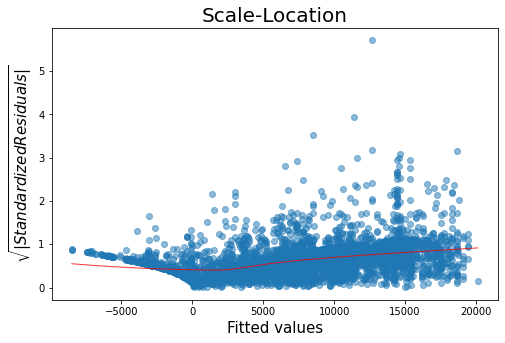

In [112]:
plot1 = plt.figure(figsize=(8, 5))

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot1.axes[0].set_title('Scale-Location',fontdict={'fontsize':20})
plot1.axes[0].set_xlabel('Fitted values', fontdict={'fontsize':15})
plot1.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$', fontdict={'fontsize':15});

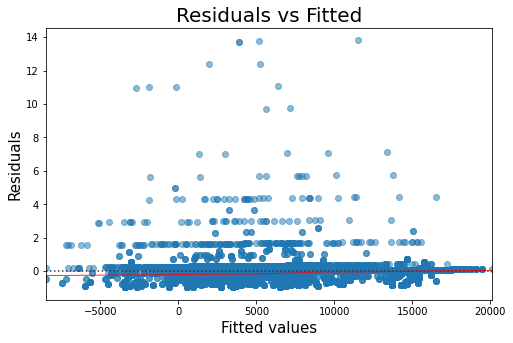

In [113]:
plot1 = plt.figure(figsize=(8, 5))
plot1.axes[0] = sns.residplot(model_fitted_y, listing_dame.columns[-1], data=listing_dame,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot1.axes[0].set_title('Residuals vs Fitted', fontdict={'fontsize':20})
plot1.axes[0].set_xlabel('Fitted values', fontdict={'fontsize':15})
plot1.axes[0].set_ylabel('Residuals', fontdict={'fontsize':15});

<Figure size 576x360 with 0 Axes>

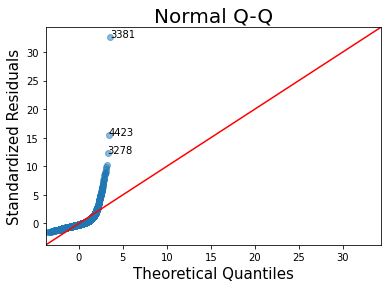

In [114]:
plot1 = plt.figure(figsize=(8, 5))

QQ = ProbPlot(model_norm_residuals)
plot1 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot1.axes[0].annotate(i,xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
plot1.axes[0].set_title('Normal Q-Q', fontdict={'fontsize':20})
plot1.axes[0].set_xlabel('Theoretical Quantiles', fontdict={'fontsize':15})
plot1.axes[0].set_ylabel('Standardized Residuals', fontdict={'fontsize':15});
plot1.show()

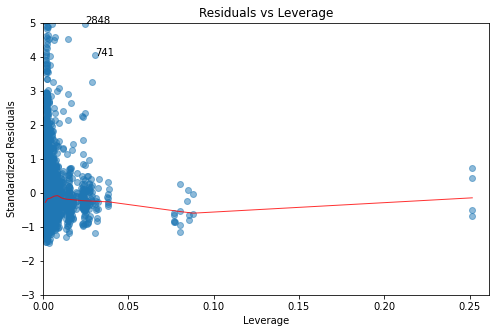

In [115]:
plot1 = plt.figure(figsize=(8, 5))
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

plot1.axes[0].set_title('Residuals vs Leverage')
plot1.axes[0].set_xlabel('Leverage')
plot1.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot1.axes[0].annotate(i,xy=(model_leverage[i],
                                    model_norm_residuals[i]));
plot1.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot1.axes[0].set_ylim(-3, 5)
plot1.show()

### 2. Model at Iteration 3 (Log)

In [116]:
# Run DAME
dame_model3 = dame_flame.matching.DAME(
    repeats=False, verbose=3, want_pe=True, early_stop_iterations=3
)
dame_model3.fit(
    listings5,
    treatment_column_name="host_is_superhost",
    outcome_column_name="annual_listing_revenue",
)
result3 = dame_model3.predict(listings5)

Iteration number:  1
	Number of matched groups formed in total:  1225
	Unmatched treated units:  7660 out of a total of  10179 treated units
	Unmatched control units:  12211 out of a total of  15591 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  5899
	Number of matches made so far:  5899
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  1225
	Unmatched treated units:  7660 out of a total of  10179 treated units
	Unmatched control units:  12211 out of a total of  15591 control units
	Predictive error of covariates chosen this iteration:  152103345.33197397
	Number of matches made in this iteration:  0
	Number of matches made so far:  5899
	In this iteration, the covariates dropped are:  frozenset({'beds'})
Iteration number:  3
	Number of matched groups formed in total:  1225
	Unmatched treated units:  7660 out of a total of  10179 treated units
	Unma

In [117]:
# Add weights and annual revenue
listing_dame3 = get_dataframe(dame_model3, result)
listing_dame3.head(5)

host_response_time  host_acceptance_rate  host_is_superhost  \
22                   0                     1                  1   
26                   0                     1                  0   
31                   0                     1                  0   
32                   0                     1                  0   
34                   1                     0                  0   

    host_identity_verified  room_type  accommodates  bathrooms_text  bedrooms  \
22                       1          0             0               0         0   
26                       1          0             1               1         1   
31                       1          0             1               1         1   
32                       1          0             1               1         1   
34                       1          0             1               1         1   

    beds  minimum_nights  ...  review_scores_value  instant_bookable  \
22     0               0  ...                    0                 1   
26     1               0  ...                    0                 1   
31     1               0  ...                    0                 1   
32     1               0  ...                    0                 1   
34     1               0  ...                    0                 0   

    calculated_host_listings_count  county  essentials  other_amenities  \
22                               0       1           1                1   
26                               3       1           1                1   
31                               3       1           1                1   
32                               3       1           1                1   
34                               0       1           1                1   

    annual_listing_revenue  match_group  match_group_size   weights  
22             5695.522388        634.0               4.0  1.000000  
26              744.776119        564.0              15.0  0.095843  
31             2561.194030        564.0              15.0  0.095843  
32            87116.417910        569.0              14.0  0.365946  
34             8740.298507        651.0               3.0  2.683605  

[5 rows x 28 columns]

In [118]:
listing_dame3['log_revenue'] = np.log2(listing_dame3['annual_listing_revenue'])

In [119]:
# Run regression
model3 = smf.ols(
    "log_revenue ~ host_is_superhost + C(county) + C(host_response_time) + C(host_acceptance_rate) + host_identity_verified +\
        C(room_type) + C(accommodates) + C(bathrooms_text) + C(bedrooms) + C(beds) + C(minimum_nights) + C(maximum_nights) + \
            C(review_scores_rating) + C(review_scores_accuracy) + C(review_scores_cleanliness) + C(review_scores_checkin) + C(review_scores_communication) + \
                C(review_scores_location) + C(review_scores_value) + instant_bookable + C(calculated_host_listings_count) + essentials + C(other_amenities)",
    listing_dame3,
    weights=listing_dame3["weights"],
).fit()

print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     163.5
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:49:38   Log-Likelihood:                -11676.
No. Observations:                5899   AIC:                         2.341e+04
Df Residuals:                    5872   BIC:                         2.359e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

# MODEL EVALUATION (with log) - Our Final Regression Model

In [120]:
model_fitted_y = model3.fittedvalues
model_residuals = model3.resid
model_norm_residuals = model3.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = model3.get_influence().hat_matrix_diag
model_cooks = model3.get_influence().cooks_distance[0]

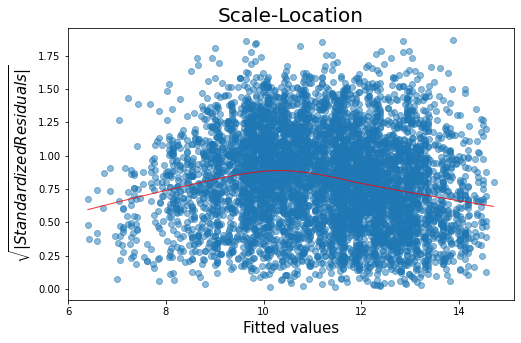

In [121]:
plot1 = plt.figure(figsize=(8, 5))

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot1.axes[0].set_title('Scale-Location',fontdict={'fontsize':20})
plot1.axes[0].set_xlabel('Fitted values', fontdict={'fontsize':15})
plot1.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$', fontdict={'fontsize':15});

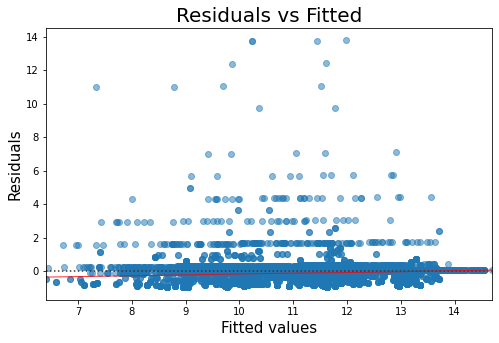

In [122]:
plot1 = plt.figure(figsize=(8, 5))
plot1.axes[0] = sns.residplot(model_fitted_y, listing_dame.columns[-1], data=listing_dame,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot1.axes[0].set_title('Residuals vs Fitted', fontdict={'fontsize':20})
plot1.axes[0].set_xlabel('Fitted values', fontdict={'fontsize':15})
plot1.axes[0].set_ylabel('Residuals', fontdict={'fontsize':15});

<Figure size 576x360 with 0 Axes>

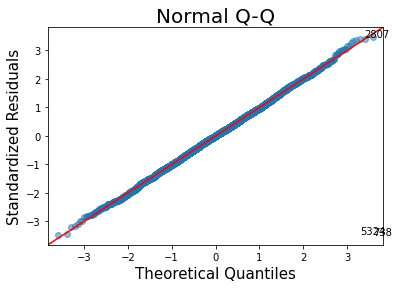

In [123]:
plot1 = plt.figure(figsize=(8, 5))

QQ = ProbPlot(model_norm_residuals)
plot1 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot1.axes[0].annotate(i,xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
plot1.axes[0].set_title('Normal Q-Q', fontdict={'fontsize':20})
plot1.axes[0].set_xlabel('Theoretical Quantiles', fontdict={'fontsize':15})
plot1.axes[0].set_ylabel('Standardized Residuals', fontdict={'fontsize':15});
plot1.show()

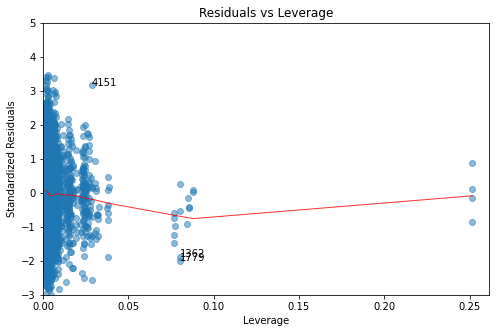

In [124]:
plot1 = plt.figure(figsize=(8, 5))
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

plot1.axes[0].set_title('Residuals vs Leverage')
plot1.axes[0].set_xlabel('Leverage')
plot1.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot1.axes[0].annotate(i,xy=(model_leverage[i],
                                    model_norm_residuals[i]));
plot1.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot1.axes[0].set_ylim(-3, 5)
plot1.show()

# CLUSTERING BY HOST

In [125]:
parmas = ['Florida County', 'Response Time of Host[T.1]', 'Response Time of Host[T.2]',
          'Response Time of Host[T.3]', 'Acceptance Rate of Host', 'Room Type[Private]', 'Room Type[Shared]',
          'Accommodates', 'Number of Bathrooms', 'Number of Bedrooms', 'Number of Beds', 'Minimum Nights',
          'Maximum Night', 'Overall Rating', 'Review Score on Accuracy',
          'Review Score on Cleanliness', 'Review Score on Checkin', 'Review Score on Communication', 
          'Review Score on Location', 'Review Score on Value', 'Total listing of Host[T.1]',
          'Total listing of Host[T.2]', 'Total listing of Host[T.3]', 'Other Amenities',
          'Super Host', 'Host Identity verified', 'Instant Booking available', 'Essentials']

In [126]:
# Drop any entries with missing data from the model
fe_groups = listing_dame3.copy()
for i in listing_dame3.columns:
    fe_groups = fe_groups[pd.notnull(fe_groups[i])]

In [127]:
# Adjust SEs
# Again, suppressing actual output for space with semicolon
print(model3.get_robustcov_results(cov_type='cluster',
                            groups=fe_groups.host_is_superhost).summary())

                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                -9.781e+13
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               1.00
Time:                        10:50:15   Log-Likelihood:                -11676.
No. Observations:                5899   AIC:                         2.341e+04
Df Residuals:                    5872   BIC:                         2.359e+04
Df Model:                          26                                         
Covariance Type:              cluster                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

# STATISTICS RESULTS

# ERROR BANDS

In [128]:
m = model3.get_robustcov_results(cov_type='cluster',
                            groups=fe_groups.host_is_superhost)
clus_conf = []
for i in m.conf_int():
  clus_conf.append(i[0])

err_series = m.params - model3.conf_int()[0]


In [129]:
# Calcualte the error bar lengths for confidence intervals.
coef_df = pd.DataFrame({'varname': err_series.index.values[1:],
                        'coef': m.params[1:],
                        'err': err_series[1:],
                       })

ValueError: The number of FixedLocator locations (27), usually from a call to set_ticks, does not match the number of ticklabels (28).

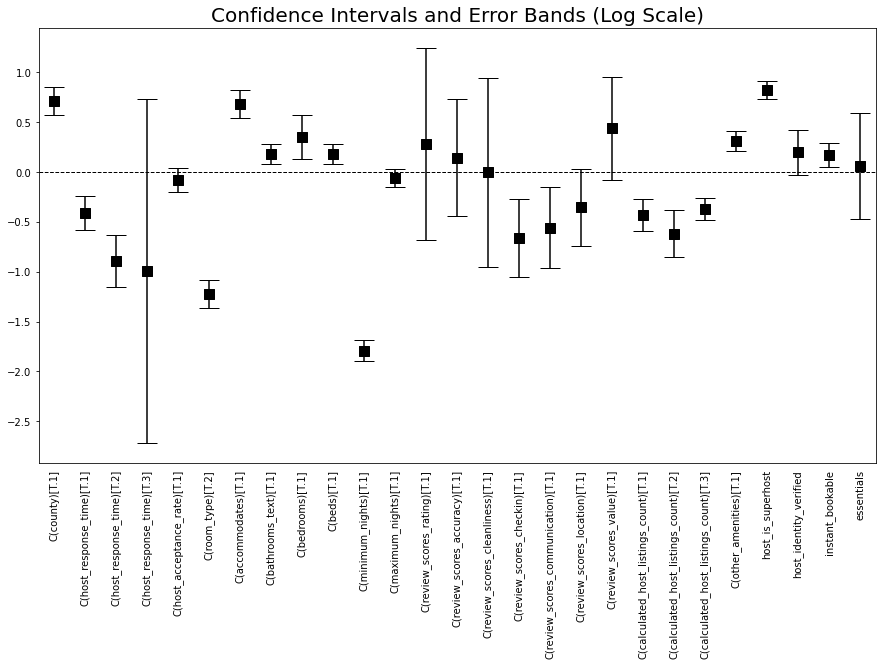

In [130]:
fig, ax = plt.subplots(figsize=(15, 8))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', capsize=10,
             yerr='err', legend=False)

ax.set_title('Confidence Intervals and Error Bands (Log Scale)', fontdict={'fontsize':20})
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(parmas, 
                       rotation=90)

# AVERAGE TREATMENT EFFECT

In [131]:
test = listing_dame3.copy()
test.host_is_superhost = listing_dame3.host_is_superhost.astype('category')

In [132]:
source = test
axis_labels = ("datum.label == 0 ? 'Regular Hosts': 'Super Hosts'")

alt.Chart(source).mark_boxplot(clip=True, size=50, extent="min-max").encode(
    x=alt.X("host_is_superhost:O", title=None, axis=alt.Axis(labels=True, labelExpr=axis_labels, labelAngle=360)), 
    y=alt.Y('log_revenue',title='Log Annual Listing Revenue ($)', scale=alt.Scale()),
    color=alt.Color('host_is_superhost', legend=None, scale=alt.Scale(scheme='dark2')),
).properties(
    width=300,
    height=300,
    title="Revenue generation for Regular and Super Hosts (Log Scale)"

).configure_axis(
    labelFontSize=12,
    titleFontSize=12
)


alt.Chart(...)

In [133]:

alt.Chart(source).mark_boxplot(clip=True, size=50, extent="min-max").encode(
    x=alt.X("host_is_superhost:O", title=None, axis=alt.Axis(labels=True, labelExpr=axis_labels, labelAngle=360)), 
    y=alt.Y('annual_listing_revenue:Q',title='Annual Listing Revenue ($)', scale=alt.Scale(domain=(0, 10000))),
    color=alt.Color('host_is_superhost', legend=None, scale=alt.Scale(scheme='dark2'))
).properties(
    width=300,
    height=300,
    title="Revenue generation for Regular and Super Hosts (Zoomed In View)"
).configure_axis(
    labelFontSize=12,
    titleFontSize=12
)


alt.Chart(...)

# STARGAZER - MODEL SUMMARY

In [134]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
stargazer = Stargazer([model3])
stargazer.rename_covariates({'C(accommodates)[T.1]': 'Accommodates', 'C(bathrooms_text)[T.1]': 'Number of Bathrooms',
                             'C(bedrooms)[T.1]': 'Number of Bedrooms', 'C(beds)[T.1]':'Number of Beds',
                             'C(calculated_host_listings_count)[T.1]': 'Total listing of Host[T.1]',
                             'C(calculated_host_listings_count)[T.2]': 'Total listing of Host[T.2]',
                             'C(calculated_host_listings_count)[T.3]': 'Total listing of Host[T.3]',
                             'C(county)[T.1]': 'Florida','C(host_acceptance_rate)[T.1]': 'Acceptance Rate of Host',
                             'C(host_response_time)[T.1]': 'Response Time of Host[T.1]', 'C(host_response_time)[T.2]':
                             'Response Time of Host[T.2]', 'C(host_response_time)[T.3]': 'Response Time of Host[T.3]',
                             'C(maximum_nights)[T.1]': 'Maximum Night customer stays at listing', 'C(minimum_nights)[T.1]':
                             'Minimum Night customer stays at listing',
                             'C(other_amenities)[T.1]': 'Other Amenities', 'C(review_scores_accuracy)[T.1]': 'Review Score on Accuracy',
                             'C(review_scores_checkin)[T.1]': 'Review Score on Checkin','C(review_scores_cleanliness[T.1]': 'Review Score on Cleanliness',
                             'C(review_scores_communication)[T.1]': 'Review Score on Communication',
                             'C(review_scores_location)[T.1]': 'Review Score on Location',
                             'C(review_scores_rating)[T.1]': 'Overall Rating','essentials': 'Essentials',
                             'C(review_scores_value)[T.1]': 'Review Score on Value',
                             'C(room_type)[T.2]': 'Room Type[Private]', 'C(room_type)[T.3]': 'Room Type[Shared]',
                             'host_identity_verified': 'Host Identity verified',
                             'host_is_superhost': 'Super Host', 'instant_bookable': 'Instant Booking available'
                             })
stargazer.covariate_order(['Intercept','host_is_superhost', 'C(county)[T.1]', 'C(room_type)[T.2]', 'C(room_type)[T.3]','C(accommodates)[T.1]',
                           'C(bathrooms_text)[T.1]', 'C(bedrooms)[T.1]', 'C(beds)[T.1]', 'essentials', 'C(other_amenities)[T.1]', 'instant_bookable',
                           'C(maximum_nights)[T.1]', 'C(minimum_nights)[T.1]', 'C(review_scores_accuracy)[T.1]',
                           'C(review_scores_checkin)[T.1]','C(review_scores_cleanliness)[T.1]','C(review_scores_communication)[T.1]', 
                           'C(review_scores_location)[T.1]', 'C(review_scores_rating)[T.1]', 'C(review_scores_value)[T.1]',
                           'host_identity_verified', 'C(calculated_host_listings_count)[T.1]', 'C(calculated_host_listings_count)[T.2]',
                           'C(calculated_host_listings_count)[T.3]', 'C(host_acceptance_rate)[T.1]', 'C(host_response_time)[T.1]', 
                           'C(host_response_time)[T.2]','C(host_response_time)[T.3]'])

HTML(stargazer.render_html())

AssertionError: Covariate order must contain subset of existing covariates: {'C(room_type)[T.3]'} are not.